In [1]:
import pandas as pd  # Pandas is a powerful library for data analysis and manipulation.
import numpy as np  # NumPy enables operations on large and multi-dimensional arrays.
import matplotlib.pyplot as plt  # Matplotlib is used for creating graphs and visualizations.
import seaborn as sns  # Seaborn provides aesthetically pleasing statistical graphics.
import warnings  
warnings.filterwarnings("ignore")  # Suppresses unnecessary warning messages while running the code.

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/data.csv", encoding="ISO-8859-1")  # Reads the CSV file.
#Note: If a different character encoding error occurs → df = pd.read_csv("C:/Users/HP/Desktop/data.csv", encoding="ISO-8859–1")| Prevents encoding error.

df.head()  # Displays the first 5 rows.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()  # Displays general information about the DataFrame.

df.describe()  # Provides a statistical summary of numerical columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.isnull().sum()  # Counts missing values.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(inplace=True) # Removes missing values and updates the dataset.


In [6]:
df.isnull().sum()  # Counts missing values.

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
print(df.columns) # Lists the column names.

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [8]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]  # Cleans and formats column names.

# Adjusting column names accordingly
df['invoicedate'] = pd.to_datetime(df['invoicedate'])  # Converts the date column to datetime format.
df['unitprice'] = df['unitprice'].astype(float)  # Converts the price column to float type.

The purpose of this code is to **organize the data, making it easier to process**. Here’s what we did step by step:

1️⃣ **Cleaned column names:**  
   - Used `strip()` to remove leading and trailing spaces.  
   - Applied `lower()` to convert all characters to lowercase.  
   - Replaced `" "` spaces with `"_"`.  
   ➝ **Result:** More consistent and accessible column names.  

2️⃣ **Converted the date column to the correct format:**  
   - Transformed `"invoicedate"` using `pd.to_datetime()` to ensure it is in date format.  
   ➝ **Result:** Dates are now sortable and analyzable.  

3️⃣ **Converted the price column to a numeric format:**  
   - Changed `"unitprice"` to `float` using `astype(float)`.  
   ➝ **Result:** The price column is now ready for mathematical operations.  

Thanks to these steps, **the dataset is now cleaner and easier to analyze**. 📊💡  

In [9]:
df.columns  #Displays column names in the DataFrame.

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [10]:
#print(sales_by_country.shape) #Displays the number of rows and columns in the DataFrame.

In [11]:
print(df['country'].unique())  #Lists unique country names in the DataFrame.

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


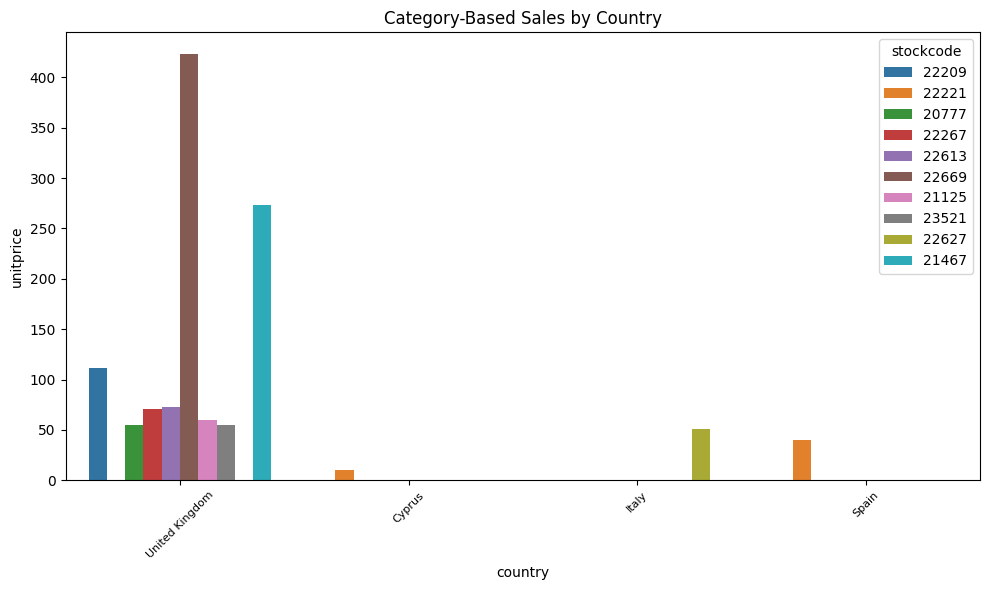

In [12]:
# Group the dataset and calculate total sales
sales_by_country = df.groupby(['country', 'stockcode'])['unitprice'].sum().reset_index()

# 🔍 If the dataset is too large, select a subset
sales_by_country = sales_by_country.sample(50, random_state=42)  # Select 50 random rows

# 🔍 Select the top 10 best-selling products to simplify the visualization
top_products = sales_by_country.groupby('stockcode')['unitprice'].sum().nlargest(10).index
sales_by_country = sales_by_country[sales_by_country['stockcode'].isin(top_products)]

# 📊 Create the bar plot
plt.figure(figsize=(10,6))  # Optimize figure size
sns.barplot(data=sales_by_country, x='country', y='unitprice', hue='stockcode')

# 🔍 Improve readability of the x-axis labels
plt.title('Category-Based Sales by Country')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

# 📌 Display the plot
plt.show()

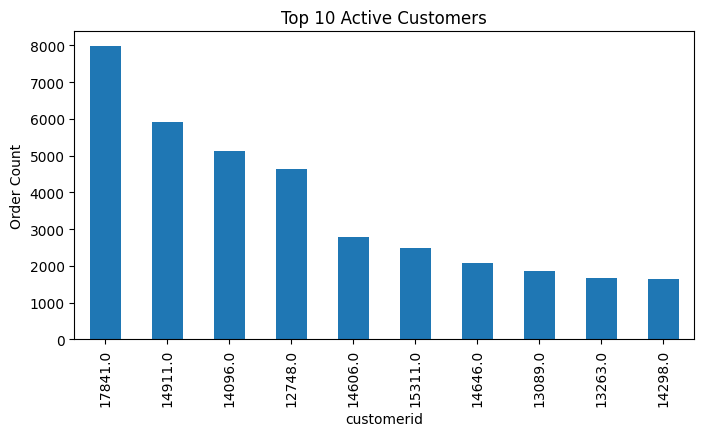

In [13]:
top_customers = df['customerid'].value_counts().head(10)  # Selects the top 10 customers by order count.
top_customers.plot(kind='bar', figsize=(8,4), title="Top 10 Active Customers")  #Displays the most active customers using a bar plot.
plt.ylabel('Order Count')  # Labels the y-axis as "Order Count."
plt.show()  # Displays the plot.

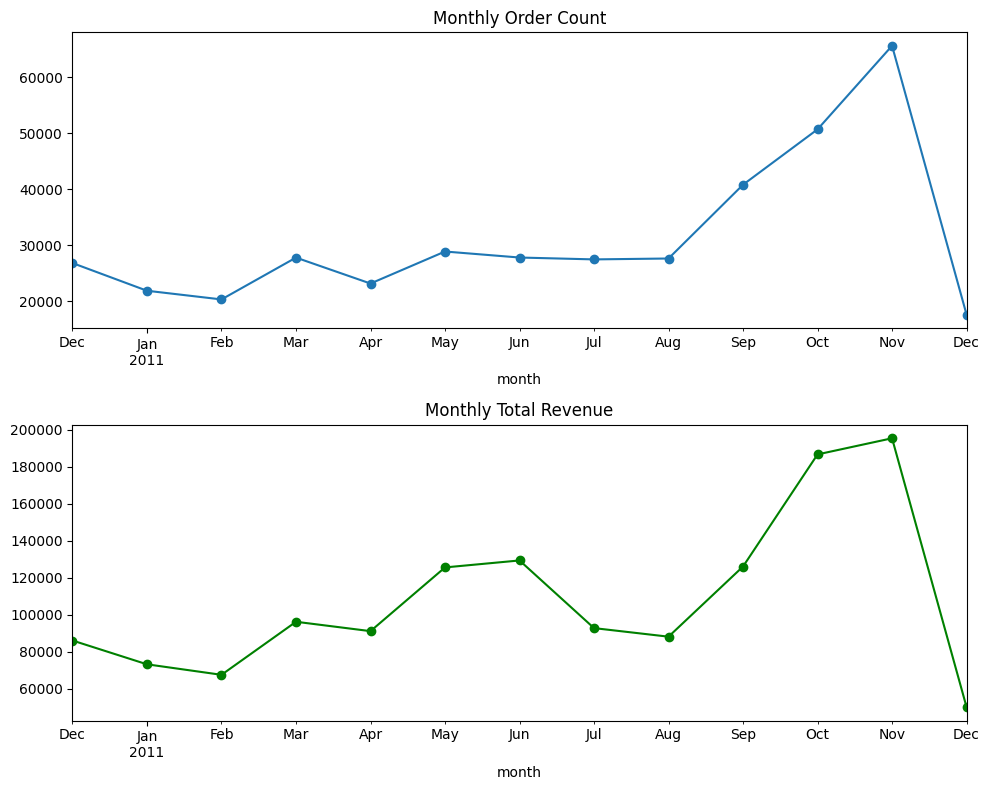

In [14]:
df['month'] = df['invoicedate'].dt.to_period('M')  # Extracts the month from the invoice date.
monthly_orders = df.groupby('month').size()  # Calculates monthly order counts.
monthly_revenue = df.groupby('month')['unitprice'].sum()  # Computes total monthly revenue.

fig, ax = plt.subplots(2, 1, figsize=(10,8))  # Sets up two plots using subplots.

monthly_orders.plot(ax=ax[0], kind='line', marker='o', title='Monthly Order Count')  # Displays order trends using a line plot.
monthly_revenue.plot(ax=ax[1], kind='line', color='green', marker='o', title='Monthly Total Revenue') # Displays monthly revenue trends using a line plot.
plt.tight_layout()  # Optimizes layout for better visualization.
plt.show()  # Displays the plots.

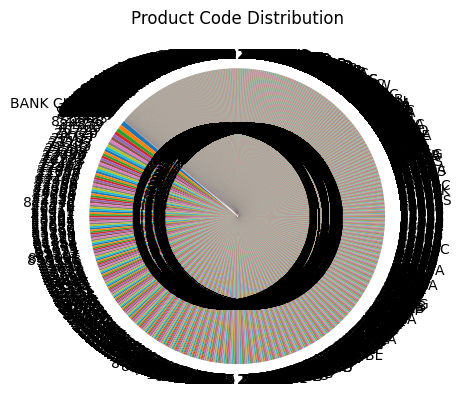

In [15]:
df['stockcode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)  # Displays stock code distribution using a pie chart.
plt.title('Product Code Distribution')  # Adds a title to the plot.
plt.ylabel('')  # Removes the y-axis label for a cleaner look.
plt.show()  # Displays the plot.

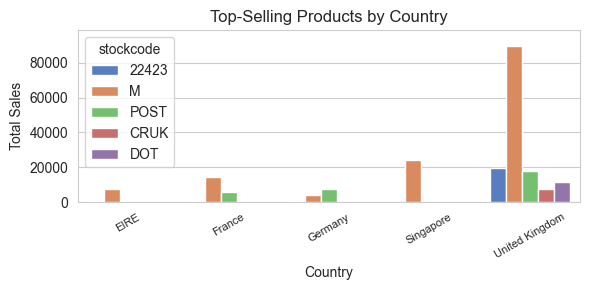

In [16]:
# Group the dataset and calculate total sales
sales_by_country = df.groupby(['country', 'stockcode'])['unitprice'].sum().reset_index()

# Select the **top 5 countries** with the highest sales
top_countries = sales_by_country.groupby('country')['unitprice'].sum().nlargest(5).index
sales_by_country = sales_by_country[sales_by_country['country'].isin(top_countries)]

# Select the **top 5 best-selling products** to simplify the visualization
top_products = sales_by_country.groupby('stockcode')['unitprice'].sum().nlargest(5).index
sales_by_country = sales_by_country[sales_by_country['stockcode'].isin(top_products)]

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("muted")  # Use softer colors

# 📊 Create a bar plot with a compact figure size
plt.figure(figsize=(6,3))  # Smaller figure size
sns.barplot(data=sales_by_country, x='country', y='unitprice', hue='stockcode')

# Adjust labels and title
plt.xlabel('Country', fontsize=10)
plt.ylabel('Total Sales', fontsize=10)
plt.title('Top-Selling Products by Country', fontsize=12)

# Improve readability of x-axis labels
plt.xticks(rotation=30, fontsize=8)  # Smaller and less rotated labels

# Limit the y-axis range
plt.ylim(0, sales_by_country['unitprice'].max() * 1.1)  # Set max to 110% of the highest value

plt.tight_layout()
plt.show()

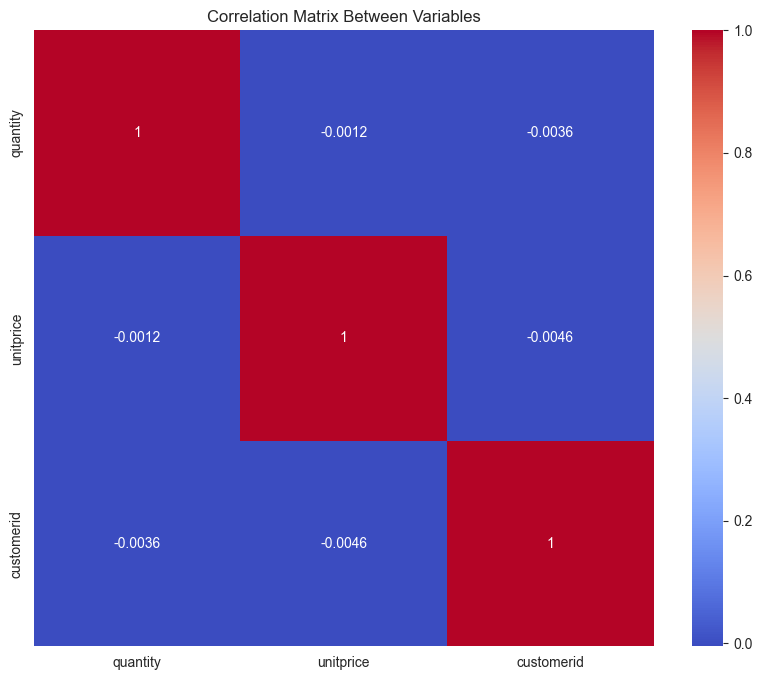

In [17]:
corr = df.corr(numeric_only=True)  # Computes correlation between numerical variables.

plt.figure(figsize=(10, 8))  # Sets figure size.
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Displays the correlation matrix as a heatmap.
plt.title("Correlation Matrix Between Variables")  # Adds a title to the plot.
plt.show()  # Displays the plot.

In [21]:
df = pd.read_csv("C:/Users/HP/Desktop/data.csv", encoding="ISO-8859-1")  # Reloads the dataset to restore its original state.

print(df.head())  # Displays the first few rows to check the data structure.

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [22]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [23]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  
# Cleans all column names by removing spaces, converting to lowercase, and replacing spaces with underscores.

print(df.columns)  # Displays the updated column names to check the changes.

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')


In [24]:
print(type(df.index))  
# Checks the current index type.  

<class 'pandas.core.indexes.range.RangeIndex'>


In [25]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])  # Converts the date column to datetime format.

df.set_index('invoicedate', inplace=True)  # Sets the invoice date as the index.

print(type(df.index))  # Verifies that the index is actually a DatetimeIndex.

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


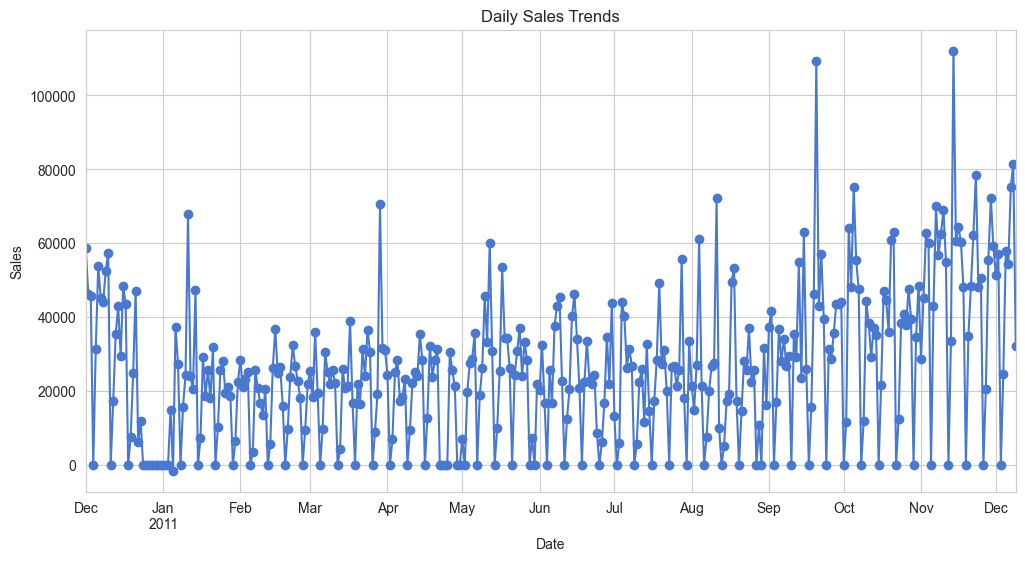

In [26]:
df['sales'] = df['quantity'] * df['unitprice']  # Creates a total sales column.
daily_sales = df.resample('D').sum(numeric_only=True)['sales']  # Calculates daily total sales.

# 📊 Generate plot
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o')  
plt.title("Daily Sales Trends")  
plt.xlabel("Date")  
plt.ylabel("Sales")  
plt.grid(True)  
plt.show()

In [27]:
print(daily_sales.index[:10])  # Checks the first 10 date values.  

DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-04',
               '2010-12-05', '2010-12-06', '2010-12-07', '2010-12-08',
               '2010-12-09', '2010-12-10'],
              dtype='datetime64[ns]', name='invoicedate', freq='D')


In [28]:
print(daily_sales.describe())  # Displays the statistical summary of daily sales.  

count       374.000000
mean      26063.497150
std       20031.204764
min       -1566.230000
25%       10410.657500
50%       25005.820000
75%       36982.692500
max      112141.110000
Name: sales, dtype: float64


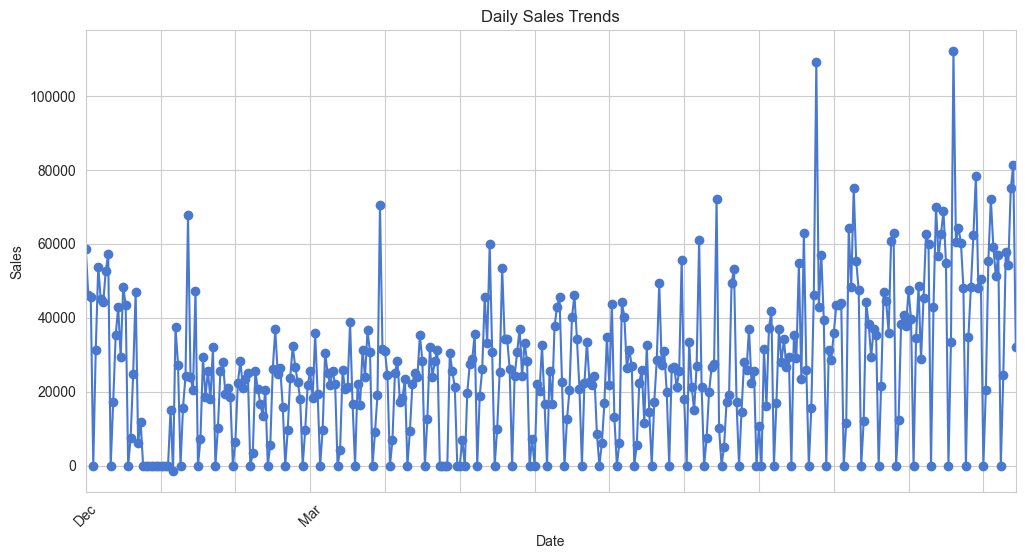

In [29]:
plt.figure(figsize=(12, 6))  # Sets the figure size for better visualization.  
daily_sales.plot(kind='line', marker='o')  # Plots daily sales as a line chart with markers.  
plt.title("Daily Sales Trends")  # Adds the title "Daily Sales Trends".  
plt.xlabel("Date")  # Labels the x-axis as "Date".  
plt.ylabel("Sales")  # Labels the y-axis as "Sales".  
plt.xticks(daily_sales.index[::30], rotation=45)  # Adds an x-axis label every 30 days and rotates labels for readability.  
plt.grid(True)  # Enables grid lines for better visualization.  
plt.show()  # Displays the plot.  

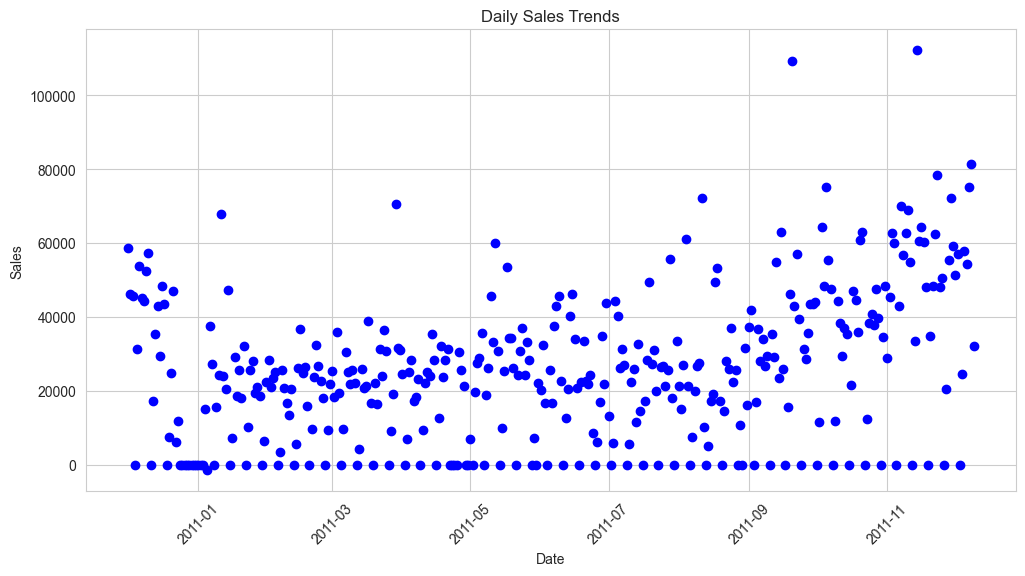

In [30]:
plt.figure(figsize=(12, 6))  # Sets the figure size for better visualization.  
plt.scatter(daily_sales.index, daily_sales, marker='o', color='blue')  # Displays data points using a scatter plot.  
plt.title("Daily Sales Trends")  # Adds the title "Daily Sales Trends".  
plt.xlabel("Date")  # Labels the x-axis as "Date".  
plt.ylabel("Sales")  # Labels the y-axis as "Sales".  
plt.grid(True)  # Enables grid lines for better readability.  
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability.  
plt.show()  # Displays the plot.  

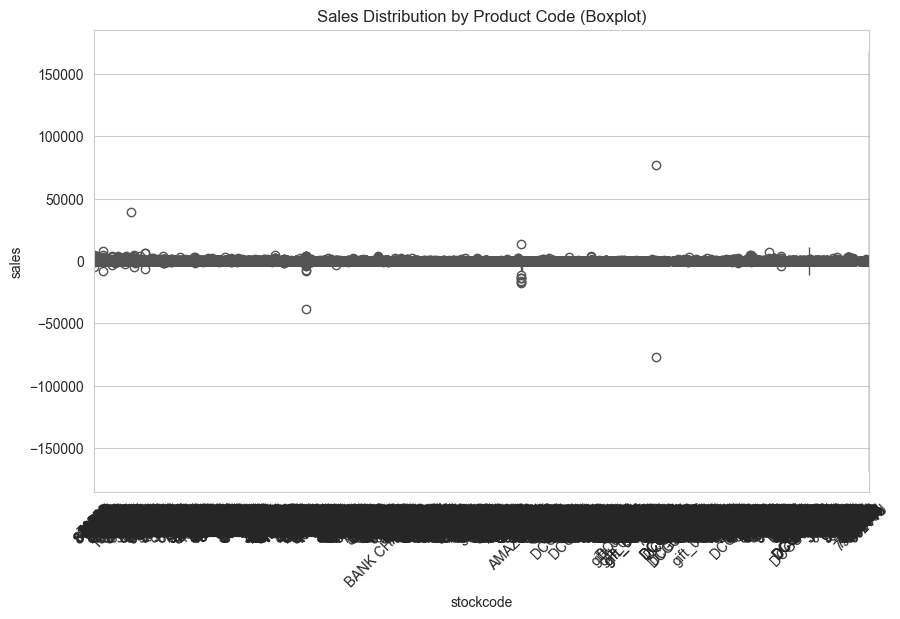

In [31]:
plt.figure(figsize=(10, 6))  # Sets the figure size for better visualization.  
sns.boxplot(x='stockcode', y='sales', data=df)  # Displays the sales distribution by product code using a boxplot.  
plt.title("Sales Distribution by Product Code (Boxplot)")  # Adds the title "Sales Distribution by Product Code (Boxplot)".  
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability.  
plt.show()  # Displays the plot.  

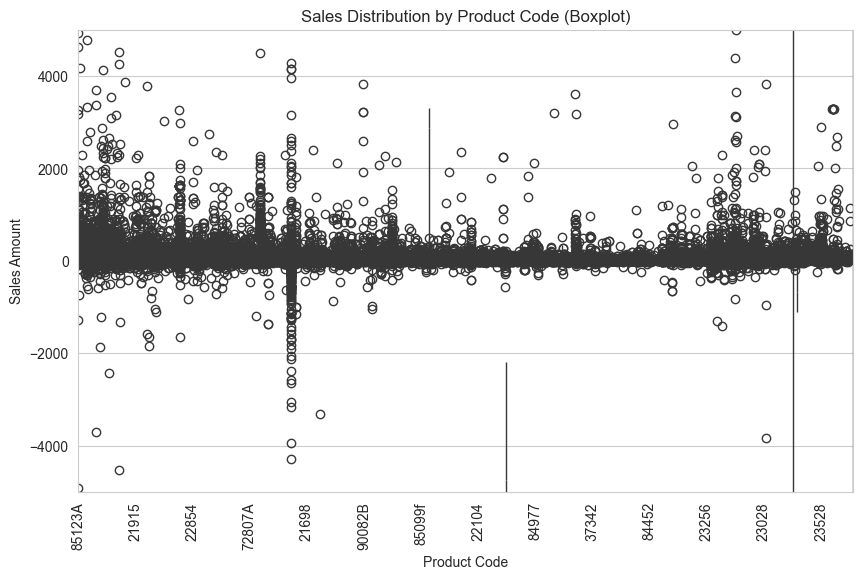

In [32]:
plt.figure(figsize=(10, 6))  # Sets the figure size for better visualization.  
sns.set_style("whitegrid")  # Applies a cleaner background style.  
sns.boxplot(x='stockcode', y='sales', data=df, palette="coolwarm")  
# Uses color styling to improve readability of the boxplot showing sales distribution by product code.  
plt.title("Sales Distribution by Product Code (Boxplot)")  # Adds the title "Sales Distribution by Product Code (Boxplot)".  
plt.xlabel("Product Code")  # Labels the x-axis as "Product Code".  
plt.ylabel("Sales Amount")  # Labels the y-axis as "Sales Amount".  

# 🔹 Optimize the x-axis by displaying only selected labels  
plt.xticks(rotation=90)  # Rotates x-axis labels vertically for better readability.  
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=15))  # Uses `nbins` instead of `n` to fix the issue and show a limited number of x-axis labels.  

# 🔹 Clip extreme values on the y-axis for clearer data visualization  
plt.ylim(-5000, 5000)  # Limits the y-axis to remove extreme values and improve readability.  
plt.show()  # Displays the plot.  

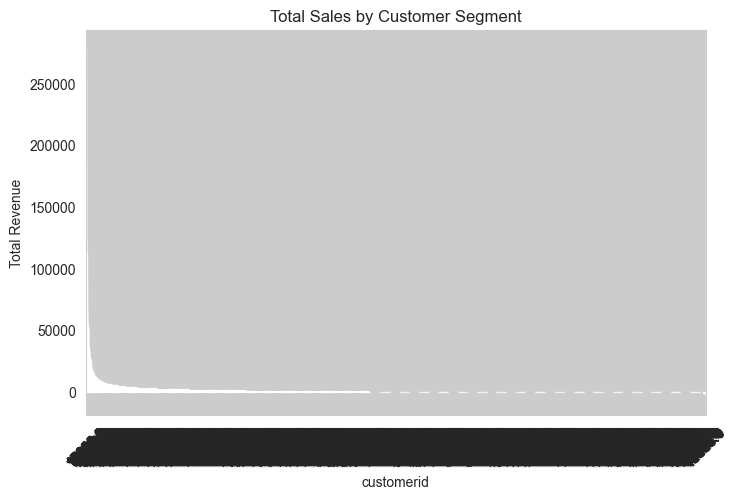

In [33]:
segment_sales = df.groupby('customerid')['sales'].sum().sort_values(ascending=False)  
# Computes total sales per customer and sorts in descending order.  
plt.figure(figsize=(8, 5))  # Sets the figure size for better visualization.  
segment_sales.plot(kind='bar', color='skyblue')  # Displays total sales per customer using a bar chart.  
plt.title("Total Sales by Customer Segment")  # Adds a title to the plot.  
plt.ylabel("Total Revenue")  # Labels the y-axis as 'Total Revenue'.  
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability.  
plt.show()  # Displays the plot.  

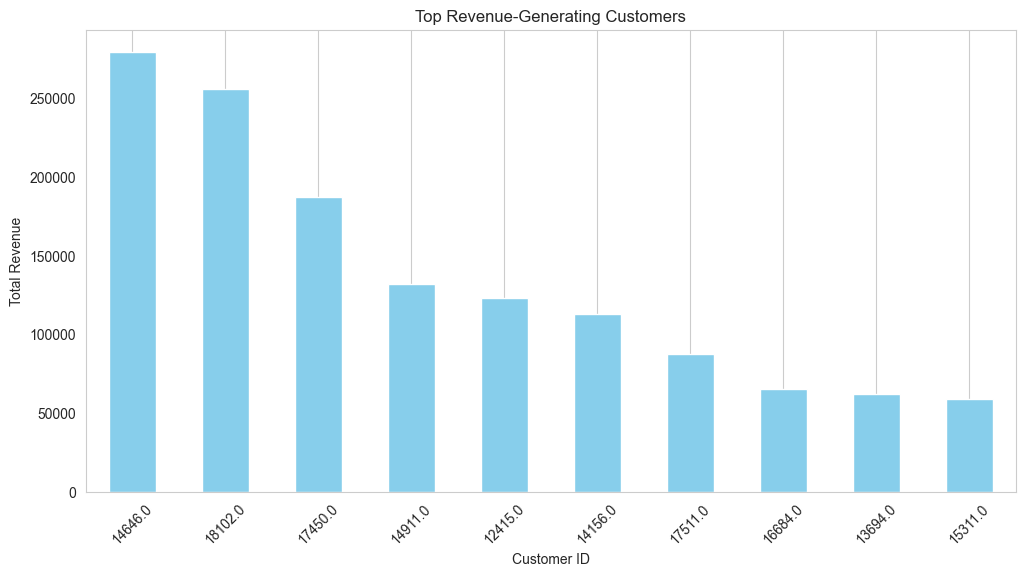

In [34]:
top_n_customers = segment_sales.head(10)  # Selects the top 10 customers with the highest sales.  

plt.figure(figsize=(12, 6))  # Sets the figure size for better visualization.  

top_n_customers.plot(kind='bar', color='skyblue')  # Displays the total revenue of the top customers using a bar chart.  

plt.title("Top Revenue-Generating Customers")  # Adds the title "Top Revenue-Generating Customers".  
plt.ylabel("Total Revenue")  # Labels the y-axis as "Total Revenue".  
plt.xlabel("Customer ID")  # Labels the x-axis as "Customer ID".  
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability.  
plt.grid(axis='y')  # Adds horizontal grid lines for improved readability.  
plt.show()  # Displays the plot. 

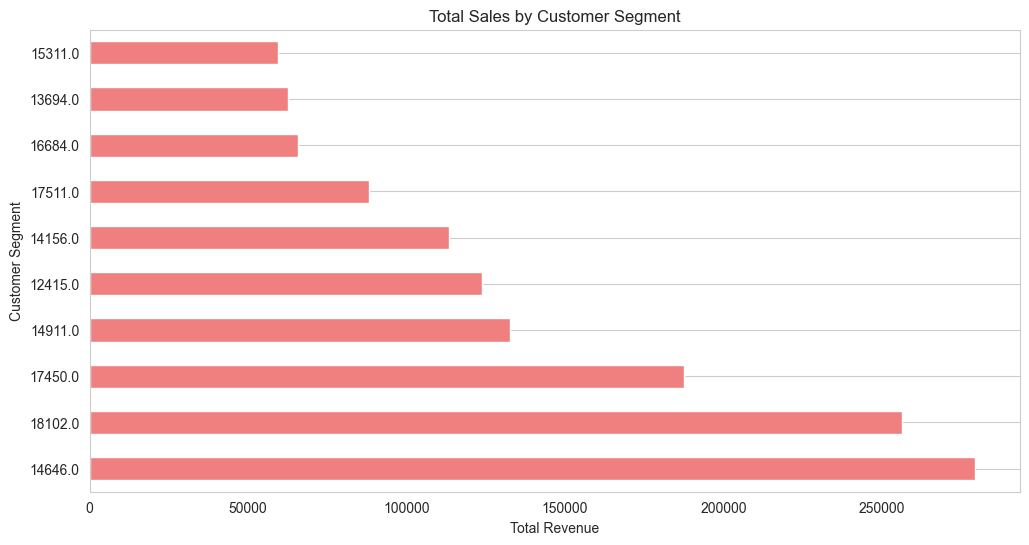

In [35]:
segment_sales = df.groupby('customerid')['sales'].sum().sort_values(ascending=False)  
# Calculates total sales per customer and sorts in descending order.  

top_n_segments = segment_sales.head(10)  # Selects the top 10 segments with the highest sales.  

plt.figure(figsize=(12, 6))  # Sets the figure size for better visualization.  

top_n_segments.plot(kind='barh', color='lightcoral')  # Displays total sales by customer segment using a horizontal bar chart for better readability.  

plt.title("Total Sales by Customer Segment")  # Adds the title "Total Sales by Customer Segment".  
plt.xlabel("Total Revenue")  # Labels the x-axis as "Total Revenue".  
plt.ylabel("Customer Segment")  # Labels the y-axis as "Customer Segment".  
plt.grid(axis='x')  # Adds vertical grid lines for better readability.  
plt.show()  # Displays the plot.  

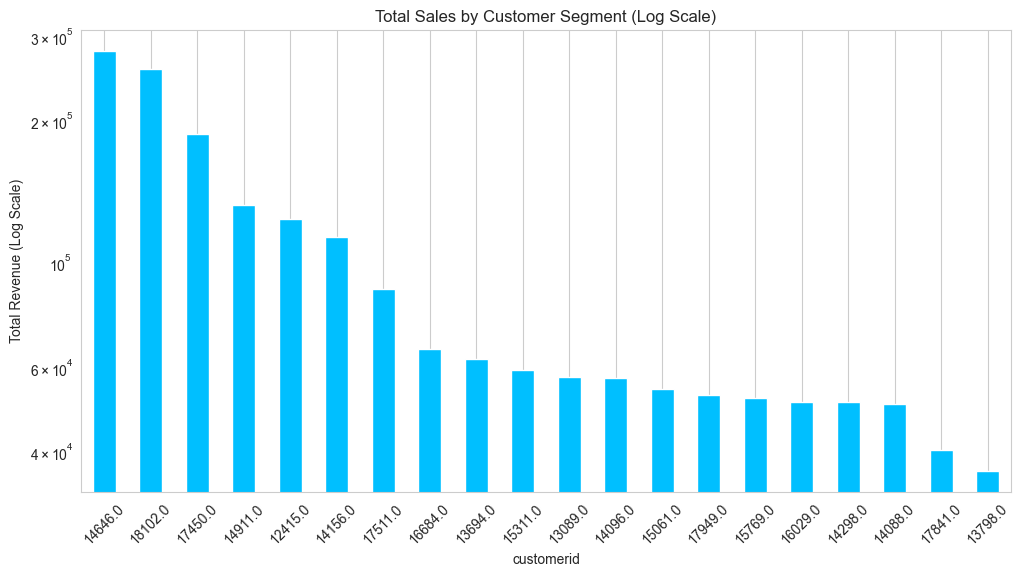

In [36]:
plt.figure(figsize=(12, 6))  # Sets the figure size for better visualization.  

segment_sales.head(20).plot(kind='bar', color='deepskyblue')  # Displays the top 20 customer segments in a bar chart.  

plt.yscale("log")  # Applies a log scale to highlight smaller differences more clearly.  
plt.title("Total Sales by Customer Segment (Log Scale)")  # Adds the title "Total Sales by Customer Segment (Log Scale)".  
plt.ylabel("Total Revenue (Log Scale)")  # Labels the y-axis as "Total Revenue (Log Scale)".  
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability.  
plt.grid(axis='y')  # Adds horizontal grid lines for better readability.  
plt.show()  # Displays the plot.  